Practica KMEANS y DBSCAN
Contenido de la actividad

Se desea detectar transacciones bancarias fraudulentas.


Aquí tienes los detalles del dataset:

https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv



Al conjunto de datos con transacciones reales, se le ha aplicado PCA por confidencialidad, al ser los datos originales sensibles.


Evalúa si eliminar o escalar las características "Time" y "Amount" que contienen datos originales (sin PCA).


Como el conjunto de datos está muy desequilibrado en cuanto a los valores de las clases, vamos a utilizar métricas de aprendizaje no supervisado.


Además, valora reducir el número de dimensiones para que funcione mejor (como ya se ha usado PCA quizás sea mejor utilizar Random Forest para la selección de características relevantes).

### 1.- Utiliza los algoritmos KMEANS y DBSCAN para entrenar, tratando de obtener el mejor resultado para ambos casos.

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

from sklearn.metrics import silhouette_score, calinski_harabasz_score

Compara los resultados de ambos, evaluando con purity_score:

In [2]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


Mira cómo representar las característiscas en histogramas, por ejemplo, con histplot de seaborn.

Además, para la representación de centroids, etc, también puedes basarte en este notebook: https://bit.ly/2TNHBZ5 



Por último, evalúa también ambos resultados con shiloutte_score y calinski_harabask_score.

### Descargar y investigar el dataset


In [3]:
import kagglehub

# base = "C:/Users/David/___utad/4_Cuarto/Q1/Aprendizaje_Automatico/datasets"

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

c:\Users\David\anaconda3\envs\aprendizaje_auto_i\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\David\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [4]:
import os

files = os.listdir(path)
print("Archivos en el dataset:", files)

Archivos en el dataset: ['creditcard.csv']


In [5]:

# Cargar el CSV y mantener los encabezados
df = pd.read_csv(path+"/creditcard.csv")

In [6]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Num de NaN

In [7]:
# Contar valores NaN en cada columna
nan_counts = df.isna().sum()

print("Número de NaN en cada columna:\n", nan_counts)

Número de NaN en cada columna:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Num de NULL

In [8]:
null_counts = df.isnull().sum()
print("Número de valores nulos en cada columna:\n", null_counts)


Número de valores nulos en cada columna:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Hago random forest para ver las caracteristicas más importantes

In [9]:
# Dividir en características (X) y etiqueta (y)
X = df.drop('Class', axis=1)
y = df['Class']

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

RandomForestClassifier(n_jobs=-1, random_state=42)

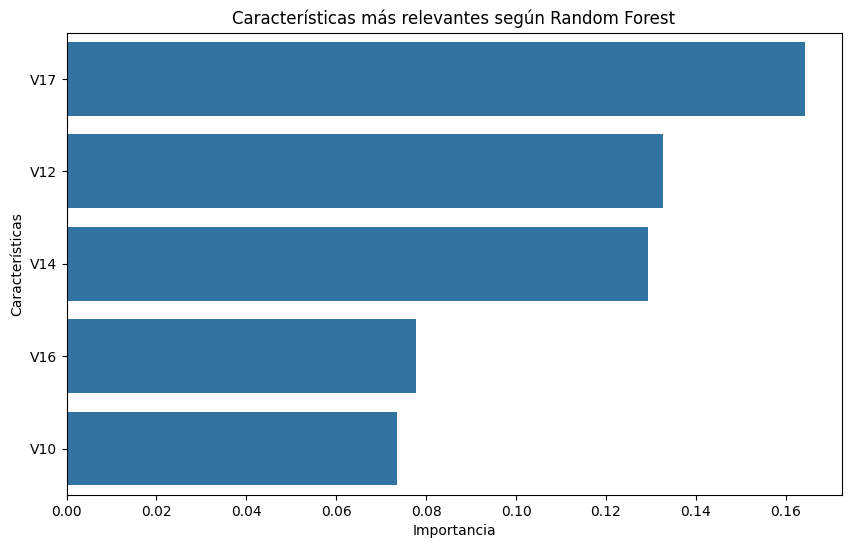

In [10]:
# Obtener la importancia de las características
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(5)  # Seleccionar las 10 características más importantes
# 
# Visualizar las características más relevantes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Características más relevantes según Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

In [ ]:


n_clusters_range = range(2, 20)  
n_features_range = range(2, 15)

best_score_cali = -1
best_score_silhu = -1

best_n_clusters_cali = None  # calinski_harabasz_score: 7
best_n_features_cali = None  # features para calinski_harabasz_score: 2

best_n_clusters_silhu = None  # calinski_harabasz_score: 3
best_n_features_silhu = None  # features para calinski_harabasz_score: 13


for n_features in n_features_range:
    print(f"\n\nNum features:{n_features}")
    for n_clusters in n_clusters_range:

        top_features = feature_importances.nlargest(5)
        X_selected = df[top_features.index]

        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_selected)
        labels = kmeans.labels_
        
        # Calcular el calinski_harabasz_score o silhouette_score
        score_cali = calinski_harabasz_score(X_selected, labels)
        score_silhou = silhouette_score(X_selected, labels, sample_size=10000)
        print(f"\nn_clusters={n_clusters}, Calinski-Harabasz Score={score_cali}")
        print(f"n_clusters={n_clusters}, Silhouette Score={score_silhou}")
        
        # Actualizar el mejor puntaje y el mejor número de clusters
        if score_cali > best_score_cali:
            best_score_cali = score_cali
            best_n_clusters_cali = n_clusters
            best_n_features_cali = n_features
        
        if score_silhou > best_score_silhu:
            best_score_silhu = score_silhou
            best_n_clusters_silhu = n_clusters
            best_n_features_silhu = n_features



print(f"\nFeatures_cali: {best_n_features_cali}")
print(f"\nClusters_cali: {best_n_clusters_cali}")
print(f"\nScore_cali: {best_score_cali}")

print(f"\nFeatures_silhu: {best_n_features_silhu}")
print(f"\nClusters_silhu: {best_n_clusters_silhu}")
print(f"\nScore_silhu: {best_score_silhu}")




Num features:2
n_clusters=2, Calinski-Harabasz Score=47831.70068309429
n_clusters=2, Silhouette Score=0.24285374181429875
n_clusters=3, Calinski-Harabasz Score=47204.81766682963
n_clusters=3, Silhouette Score=0.2594154784957417
n_clusters=4, Calinski-Harabasz Score=49028.17074200792
n_clusters=4, Silhouette Score=0.2467342266909266
n_clusters=5, Calinski-Harabasz Score=45893.871957025054
n_clusters=5, Silhouette Score=0.23784321672756856
n_clusters=6, Calinski-Harabasz Score=57775.07421208891
n_clusters=6, Silhouette Score=0.22215706875038774
n_clusters=7, Calinski-Harabasz Score=59098.56540081833
n_clusters=7, Silhouette Score=0.23480326955307224
n_clusters=8, Calinski-Harabasz Score=57110.039864772145
n_clusters=8, Silhouette Score=0.21770193902835236
n_clusters=9, Calinski-Harabasz Score=54310.6012820317
n_clusters=9, Silhouette Score=0.18195483160074297
n_clusters=10, Calinski-Harabasz Score=52196.345749880566
n_clusters=10, Silhouette Score=0.18176215894401596
n_clusters=11, Cal

In [15]:
# KMeans

# Features_cali: 2
# Clusters_cali: 7
# Score_cali: 59098.56540081833

# Features_silhu: 13
# Clusters_silhu: 3
# Score_silhu: 0.26307128933305685

best_n_features = 2
best_n_clusters = 7

top_features = feature_importances.nlargest(best_n_features)
X_selected_KMeans = df[top_features.index]

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_selected)
kmeans_labels = kmeans.labels_

In [ ]:
n_features_range = range(2, 15)

# Definir los rangos para eps y min_samples
eps_range = [0.2, 0.4, 0.6, 0.8]  # Ajusta este rango según tus datos
min_samples_range = range(5, 21, 2)

best_score_cali = -1
best_score_silhu = -1

best_eps_cali = None
best_min_samples_cali = None
best_n_features_cali = None  # Almacena el número de características

best_eps_silhu = None
best_min_samples_silhu = None
best_n_features_silhu = None  # Almacena el número de características

# Probar diferentes combinaciones de eps y min_samples
for n_features in n_features_range:
    print(f"\n\nN_features: {n_features}")
    top_features = feature_importances.nlargest(n_features)
    X_selected_DBSCAN = df[top_features.index]
    
    for eps in eps_range:
        print(f"\n\nEps: {eps}")
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan_labels = dbscan.fit_predict(X_selected_DBSCAN)

            # Ignorar etiquetas de ruido (-1)
            if len(set(dbscan_labels)) > 1:
                # Calcular Calinski-Harabasz Score
                score_cali = calinski_harabasz_score(X_selected_DBSCAN, dbscan_labels)
                # Calcular Silhouette Score
                score_silhou = silhouette_score(X_selected_DBSCAN, dbscan_labels, sample_size=10000)

                print(f"\neps={eps}, min_samples={min_samples}, Calinski-Harabasz Score={score_cali}")
                print(f"eps={eps}, min_samples={min_samples}, Silhouette Score={score_silhou}")

                # Actualizar el mejor puntaje y los mejores parámetros para Calinski-Harabasz
                if score_cali > best_score_cali:
                    best_score_cali = score_cali
                    best_eps_cali = eps
                    best_min_samples_cali = min_samples
                    best_n_features_cali = n_features  # Actualizar el número de características

                # Actualizar el mejor puntaje y los mejores parámetros para Silhouette
                if score_silhou > best_score_silhu:
                    best_score_silhu = score_silhou
                    best_eps_silhu = eps
                    best_min_samples_silhu = min_samples
                    best_n_features_silhu = n_features  # Actualizar el número de características

# Imprimir los mejores resultados
print(f"\nMejores parámetros para Calinski-Harabasz: eps={best_eps_cali}, min_samples={best_min_samples_cali}, n_features={best_n_features_cali}, Score={best_score_cali}")
print(f"\nMejores parámetros para Silhouette: eps={best_eps_silhu}, min_samples={best_min_samples_silhu}, n_features={best_n_features_silhu}, Score={best_score_silhu}")






Eps: 0.2


Mejor Calinski-Harabasz Score:

Top 2 features.

-   Eps: 0.8, min_samples: 15
    -    Calinski-Harabasz Score = 39025.98
    -   Silhouette Score = 0.9108

Mejor Silhouette Score:

-   Eps: 0.8, min_samples: 15
    -    Calinski-Harabasz Score = 39025.98
    -   Silhouette Score = 0.9108

(no te puedo mostrar la ejecución porque en el collab entrenar esto me consumió 270gb de ram)

In [17]:
# DBSCAN

# eps es el radio de un punto a otro para que se pueda considerar vecino
# min_samples es el numero mínimo de vecinos que tine que tener un punto para ser considerado core
dbscan = DBSCAN(eps=0.4, min_samples=3)
dbscan.fit(X_selected)
dbscan_labels = dbscan.labels_

In [18]:
# Pureza
print("KMeans purity_score:", purity_score(y, kmeans_labels))
print("DBSCAN purity_score:", purity_score(y, dbscan_labels))

KMeans purity_score: 0.9982725143693799
DBSCAN purity_score: 0.9984586053011337


In [ ]:
# Silhouette Score
print("KMeans silhouette_score:", silhouette_score(X_selected_KMeans, kmeans_labels, sample_size=10000))
print("DBSCAN silhouette_score:", silhouette_score(X_selected_DBSCAN, dbscan_labels, sample_size=10000))

KMeans silhouette_score: 0.2711068335878406
DBSCAN silhouette_score: -0.23143037932515423


In [ ]:
# Calinski-Harabasz Score
print("KMeans calinski_harabasz_score:", calinski_harabasz_score(X_selected_KMeans, kmeans_labels))
print("DBSCAN calinski_harabasz_score:", calinski_harabasz_score(X_selected_DBSCAN, dbscan_labels))

KMeans calinski_harabasz_score: 81837.44338292502
DBSCAN calinski_harabasz_score: 64.92493847952291


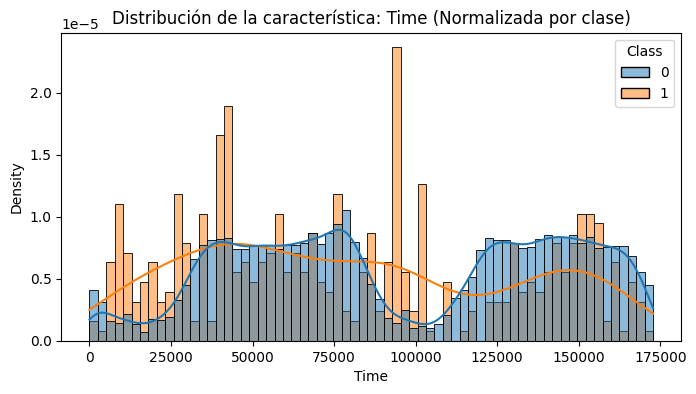

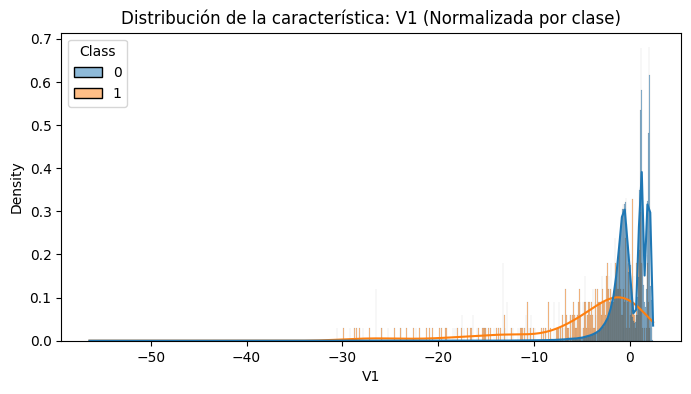

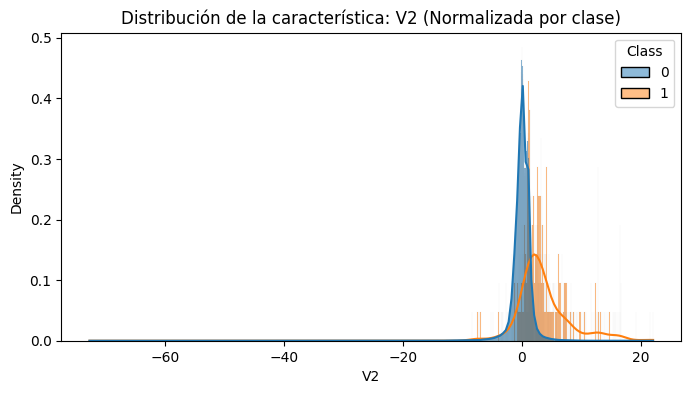

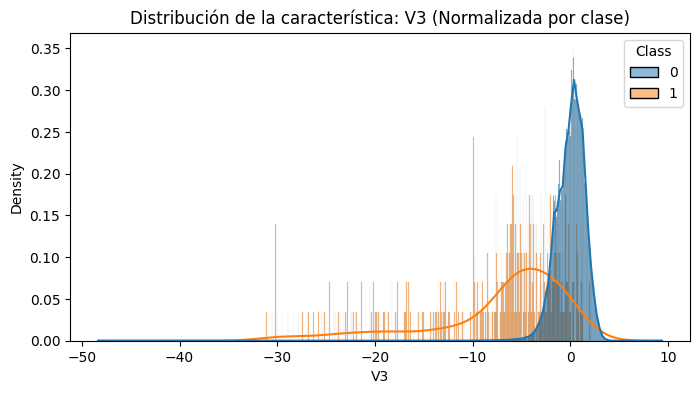

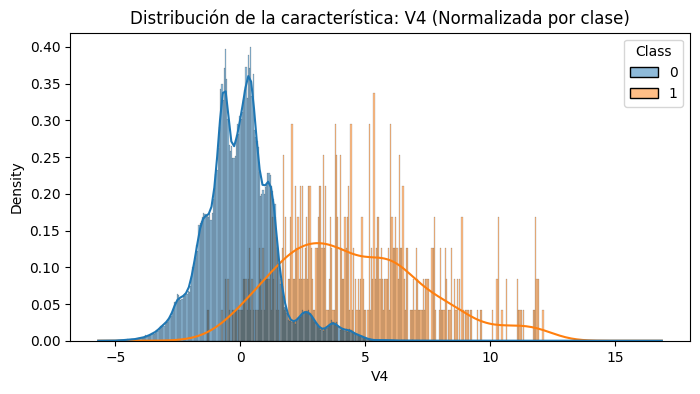

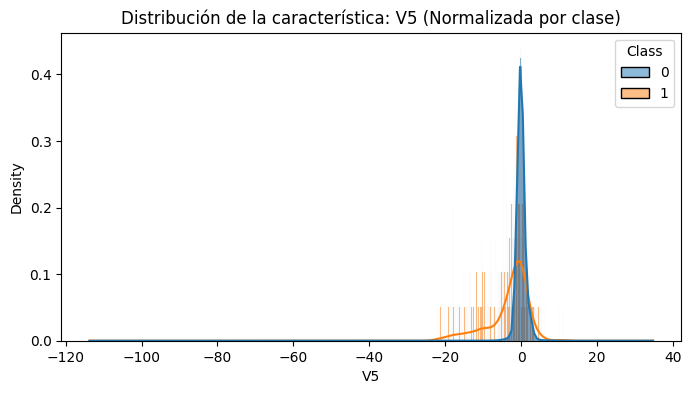

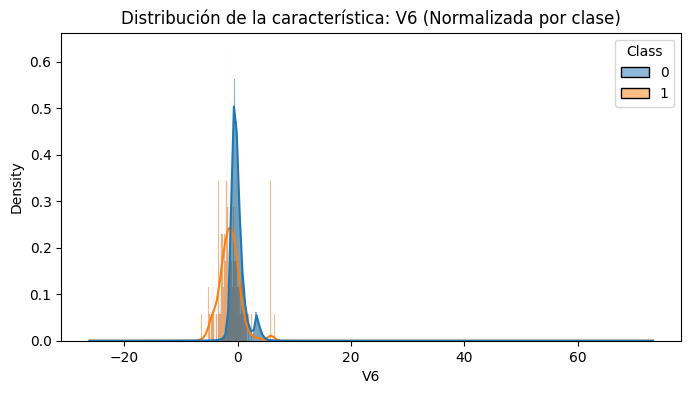

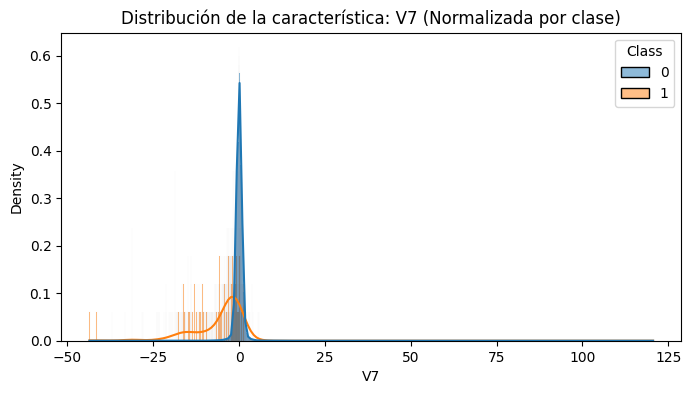

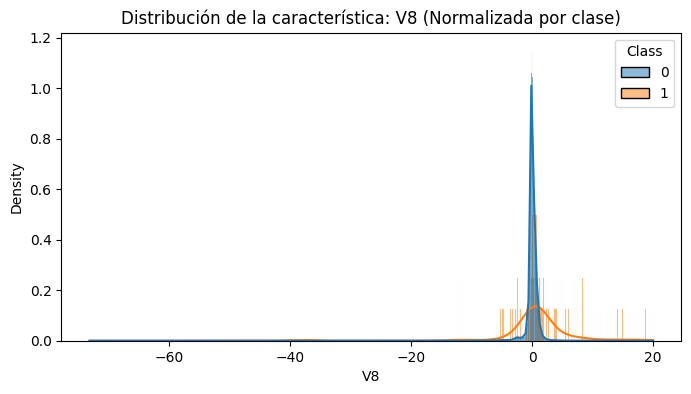

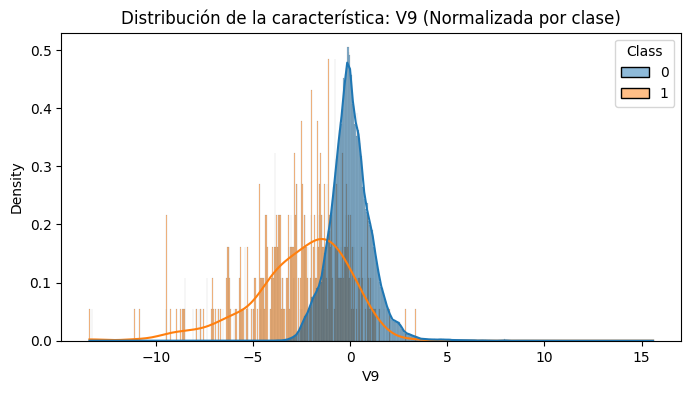

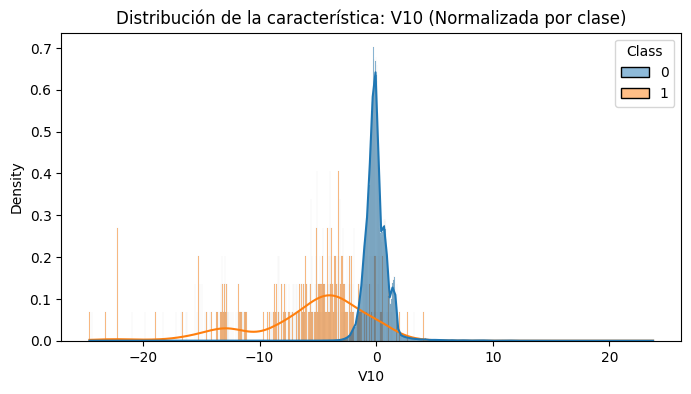

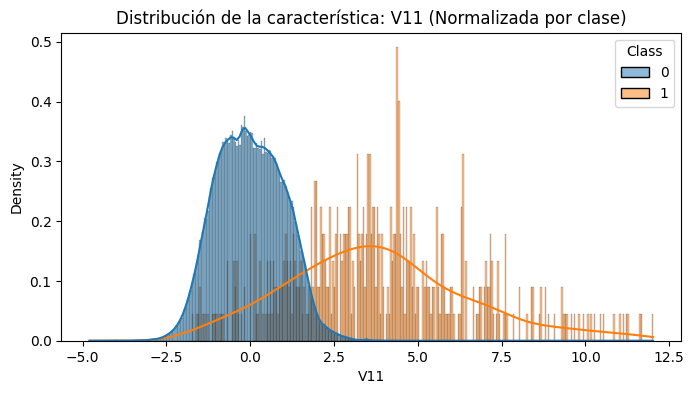

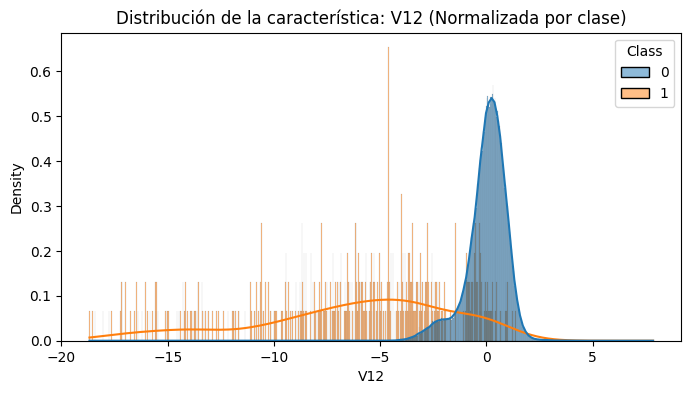

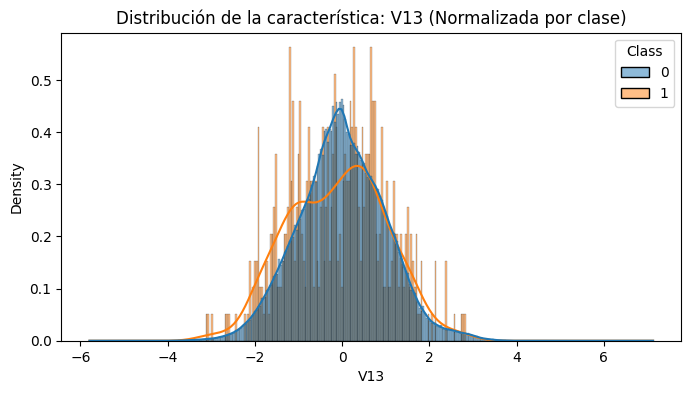

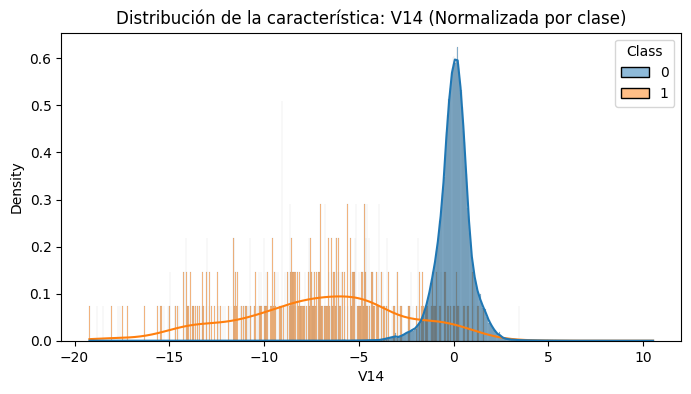

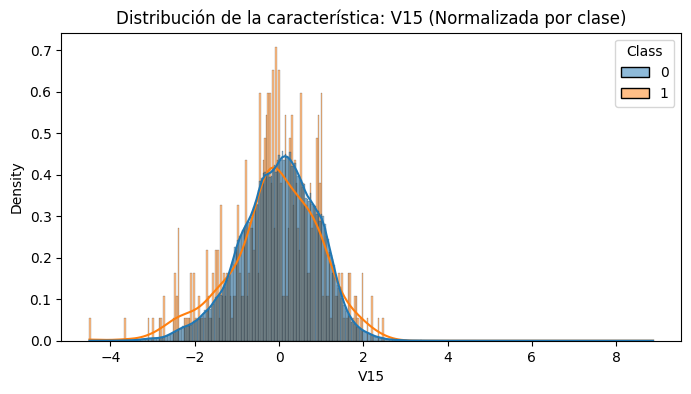

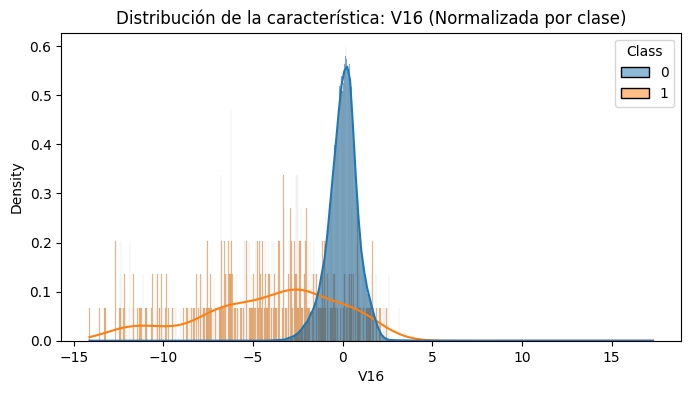

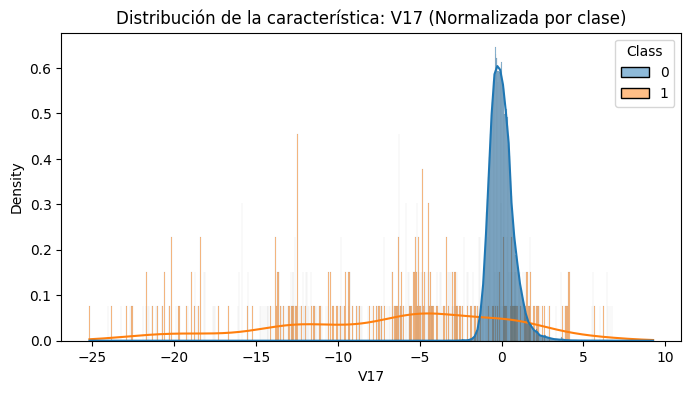

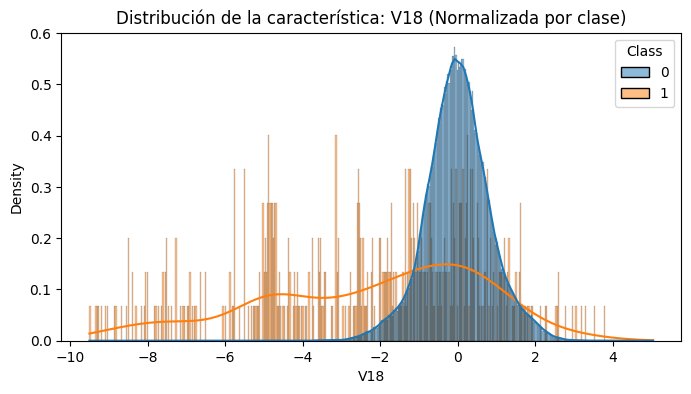

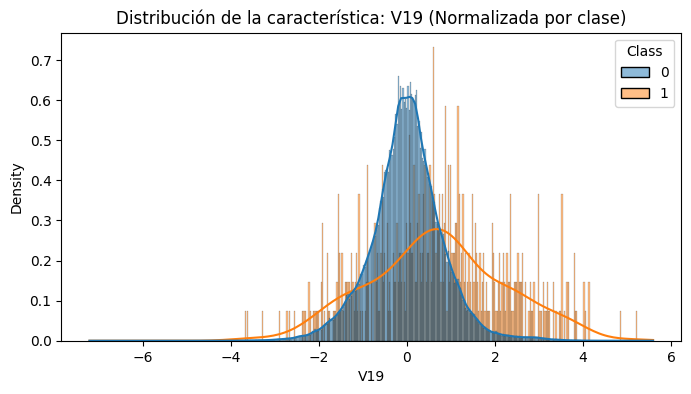

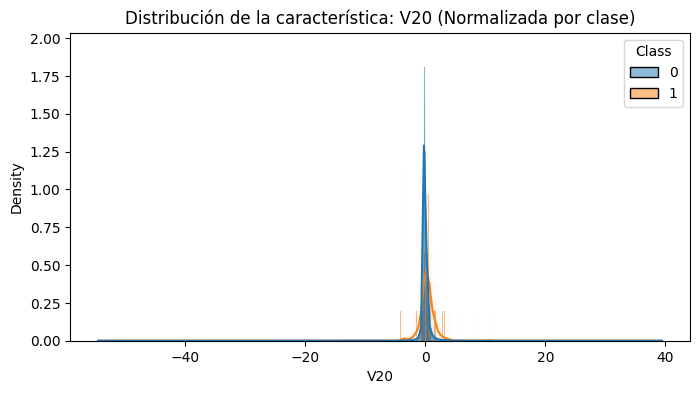

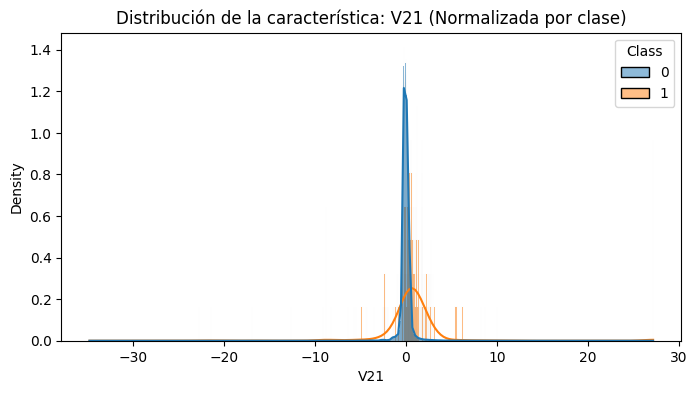

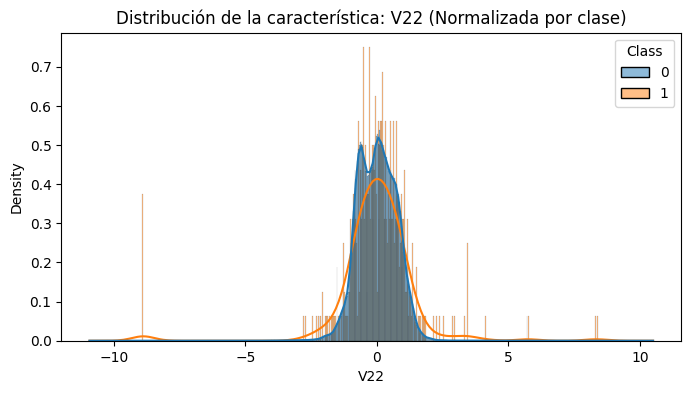

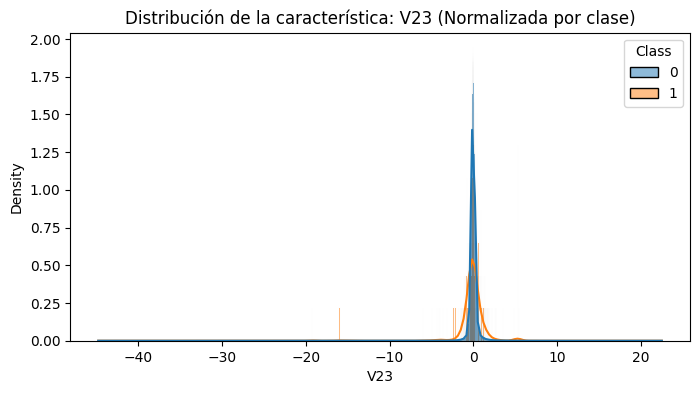

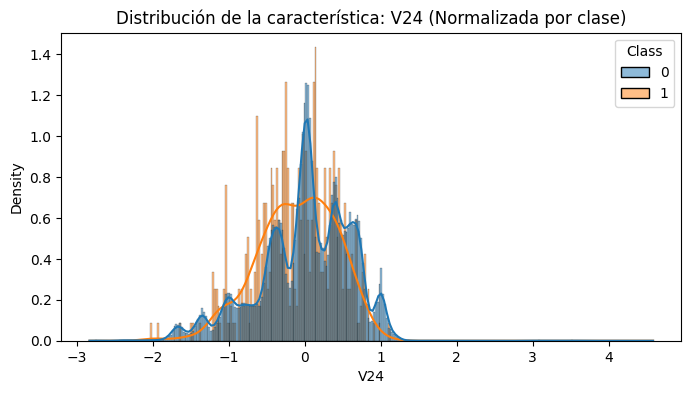

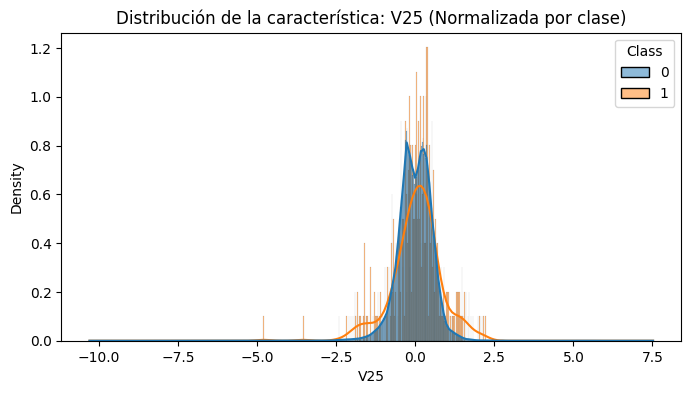

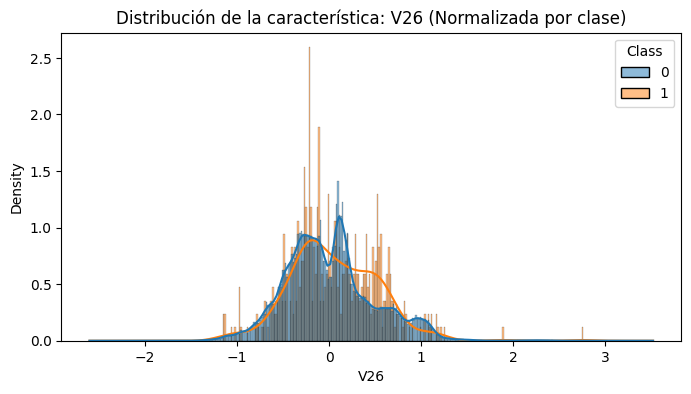

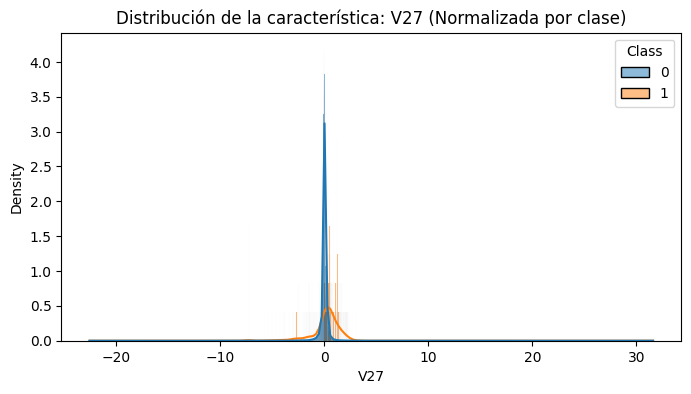

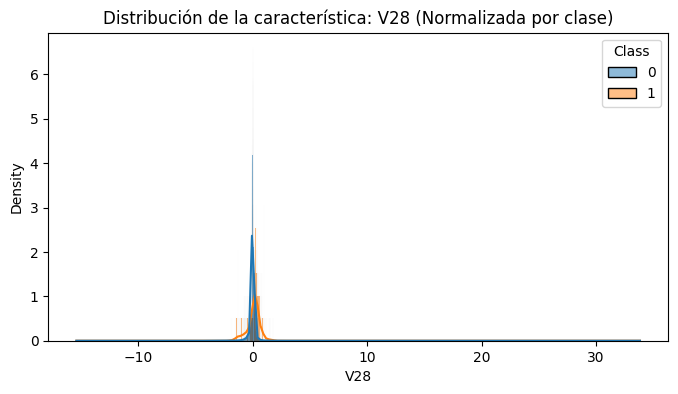

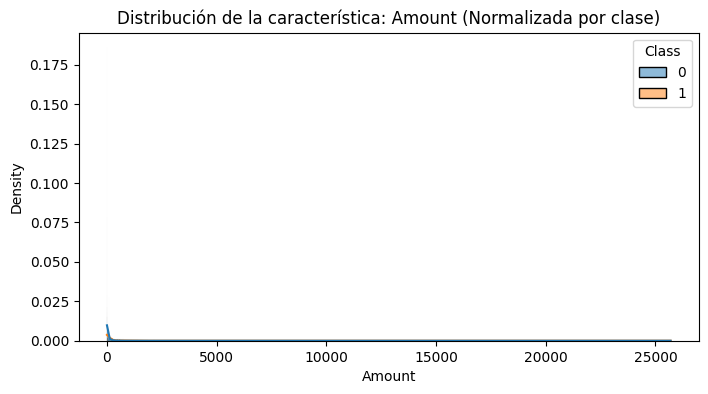

In [22]:
for feature in feature_importances.index:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='Class', kde=True, stat="density", common_norm=False, alpha=0.5)
    plt.title(f"Distribución de la característica: {feature} (Normalizada por clase)")
    plt.show()